# Building CNN classifier for CIFAR-10

This dataset contains 10 different classes and you can learn more about it [here](https://www.cs.toronto.edu/~kriz/cifar.html). This project consists of 4 steps:
* Dataset inspection
* Building the network
* Training
* Evaluation

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import scipy
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Rescaling
from tensorflow.keras import Model
from tensorflow import keras
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Step 0: Dataset Inspection

Load the dataset and make a quick inspection.

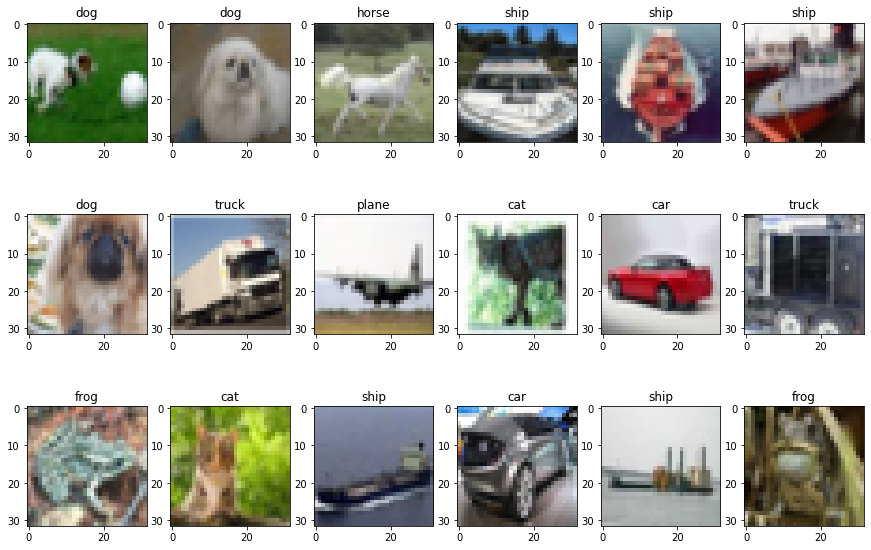

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, len(x_train))
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

C:\Users\vshvedov\AppData\Local\Temp\ipykernel_15072\1347751857.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train_df['class_name'][i]= classes[y_train_df['class_id'][i]]


Text(0.5, 0, 'Object')

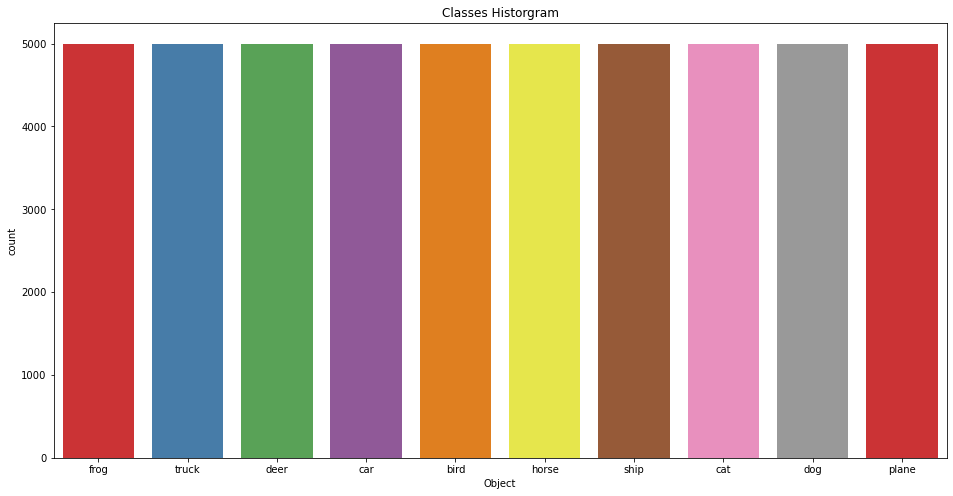

In [3]:
# Compute the class histogram
import seaborn as sns
plt.figure(figsize=(16,8))
y_train_df = pd.DataFrame(y_train, columns =  ['class_id'])
y_train_df["class_name"] = np.nan
for i in range(0,y_train_df.shape[0]):
    y_train_df['class_name'][i]= classes[y_train_df['class_id'][i]]
ax = sns.countplot(x="class_name", data=y_train_df,palette="Set1")
plt.title('Classes Historgram')
plt.xlabel('Object')
# dataset is perfectly balanced

### Step 1: Data Preparation

>normalize

>encode the labels as one-hot vectors.

In [4]:
# Normalization
x_train =x_train /255
x_test = x_test/255

# One-hot encoding
from sklearn.preprocessing import OneHotEncoder

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


### Step 2: Building the Classifier

Build the CNN for CIFAR10 classification.

In [6]:
# Build the classifier
size = x_train.shape[1]
inputs = Input(shape=(size, size, 3))

net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0     

### Step 3: Training

Compile the model and train it.

In [7]:
epochs = 25
batch_size = 128
validation_split = 0.1
# Compile the model
model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

# Train the model
start = time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split = validation_split)
print('Elapsed time', time() - start)

Epoch 1/25
352/352 [==============================] - 41s 105ms/step - loss: 0.0756 - accuracy: 0.3743 - val_loss: 0.0690 - val_accuracy: 0.4554
Epoch 2/25
352/352 [==============================] - 35s 99ms/step - loss: 0.0649 - accuracy: 0.4945 - val_loss: 0.0621 - val_accuracy: 0.5232
Epoch 3/25
352/352 [==============================] - 33s 95ms/step - loss: 0.0606 - accuracy: 0.5350 - val_loss: 0.0592 - val_accuracy: 0.5478
Epoch 4/25
352/352 [==============================] - 37s 105ms/step - loss: 0.0580 - accuracy: 0.5582 - val_loss: 0.0572 - val_accuracy: 0.5694
Epoch 5/25
352/352 [==============================] - 35s 99ms/step - loss: 0.0560 - accuracy: 0.5767 - val_loss: 0.0548 - val_accuracy: 0.5858
Epoch 6/25
352/352 [==============================] - 36s 103ms/step - loss: 0.0542 - accuracy: 0.5932 - val_loss: 0.0531 - val_accuracy: 0.6044
Epoch 7/25
352/352 [==============================] - 35s 100ms/step - loss: 0.0529 - accuracy: 0.6052 - val_loss: 0.0520 - val_accur

Train Acc      0.7052000164985657
Validation Acc 0.6570000052452087


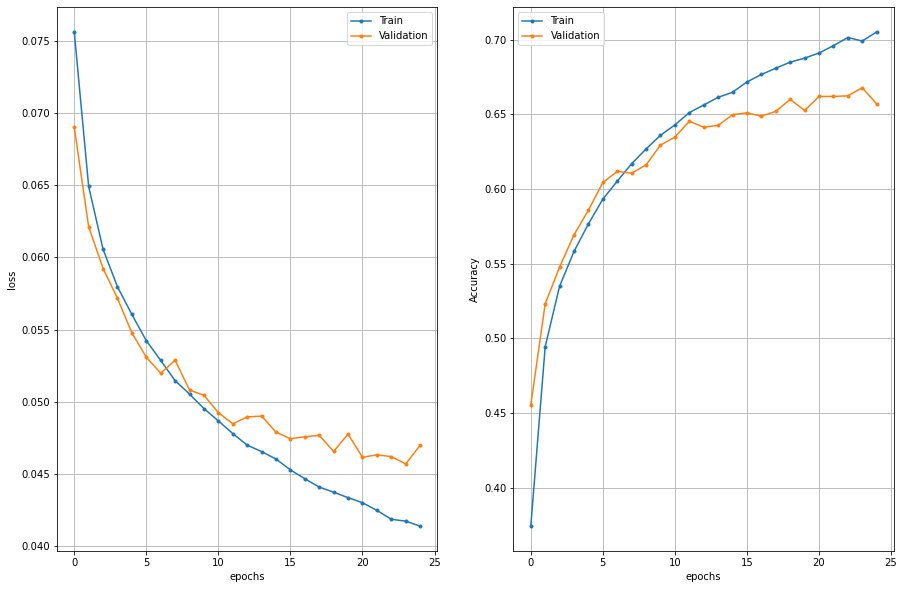

In [8]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

### Step 4: Evaluation

In [9]:
# Compute the labels and the predictions as sparse values
y_true = y_test
y_pred = model.predict(x_test)

313/313 [==============================] - 6s 17ms/step


In [10]:
y_true_argmax = np.argmax(y_true, axis=1)
y_pred_argmax = np.argmax(y_pred, axis=1)

In [11]:
# Compute and print the accuracy for each class
for class_id, class_name in classes.items():
    sum_class = 0
    for i in range(len(y_true_argmax)):
        if y_true_argmax[i] == class_id == y_pred_argmax[i]:
            sum_class = sum_class+1       
    acc = sum_class/np.sum(y_true[:,class_id])
    print(class_name, acc)

plane 0.733
car 0.778
bird 0.659
cat 0.432
deer 0.423
dog 0.532
frog 0.714
horse 0.742
ship 0.724
truck 0.702


In [12]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 5s 17ms/step - loss: 0.0480 - accuracy: 0.6439
Test loss   0.04800782352685928
Test metric 0.6438999772071838


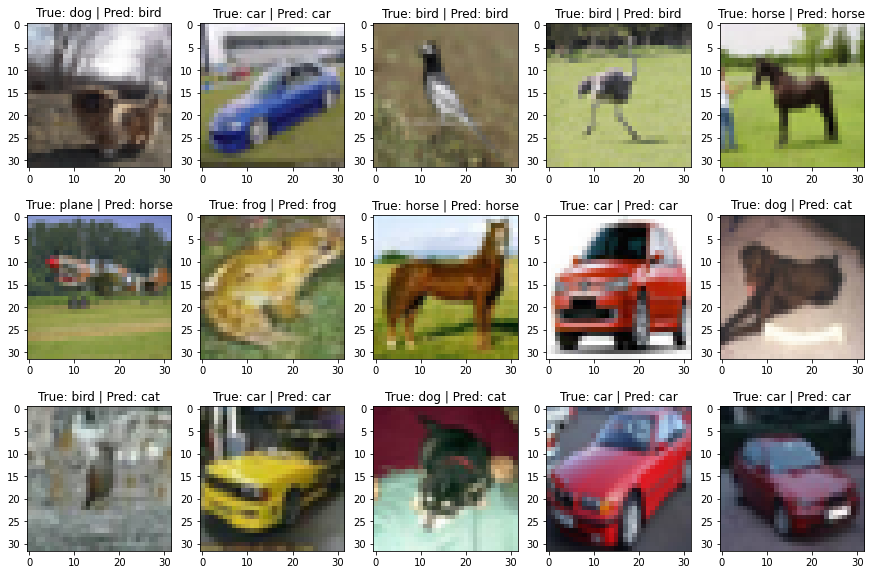

In [13]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, len(y_pred))
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true_argmax[idx]]) + ' | Pred: ' + str(classes[y_pred_argmax[idx]]))

### Results
* Overall accuracy of the classifier:  0.6822

In [14]:
# Try to improve model
size = x_train.shape[1]

model = keras.Sequential([
  Rescaling(1, input_shape=(size, size, 3)),
  Conv2D(16, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
epochs = 15
batch_size = 128
validation_split = 0.1
# Compile the model
model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

# Train the model
start = time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split = validation_split)
print('Elapsed time', time() - start)

Epoch 1/15
352/352 [==============================] - 51s 133ms/step - loss: 0.0741 - accuracy: 0.4272 - val_loss: 0.0667 - val_accuracy: 0.5048
Epoch 2/15
352/352 [==============================] - 46s 130ms/step - loss: 0.0602 - accuracy: 0.5761 - val_loss: 0.0565 - val_accuracy: 0.6102
Epoch 3/15
352/352 [==============================] - 47s 134ms/step - loss: 0.0529 - accuracy: 0.6426 - val_loss: 0.0517 - val_accuracy: 0.6542
Epoch 4/15
352/352 [==============================] - 40s 113ms/step - loss: 0.0480 - accuracy: 0.6839 - val_loss: 0.0479 - val_accuracy: 0.6892
Epoch 5/15
352/352 [==============================] - 44s 126ms/step - loss: 0.0444 - accuracy: 0.7152 - val_loss: 0.0465 - val_accuracy: 0.6966
Epoch 6/15
352/352 [==============================] - 44s 126ms/step - loss: 0.0420 - accuracy: 0.7357 - val_loss: 0.0447 - val_accuracy: 0.7044
Epoch 7/15
352/352 [==============================] - 44s 125ms/step - loss: 0.0396 - accuracy: 0.7584 - val_loss: 0.0437 - val_ac

Train Acc      0.8618888854980469
Validation Acc 0.7360000014305115


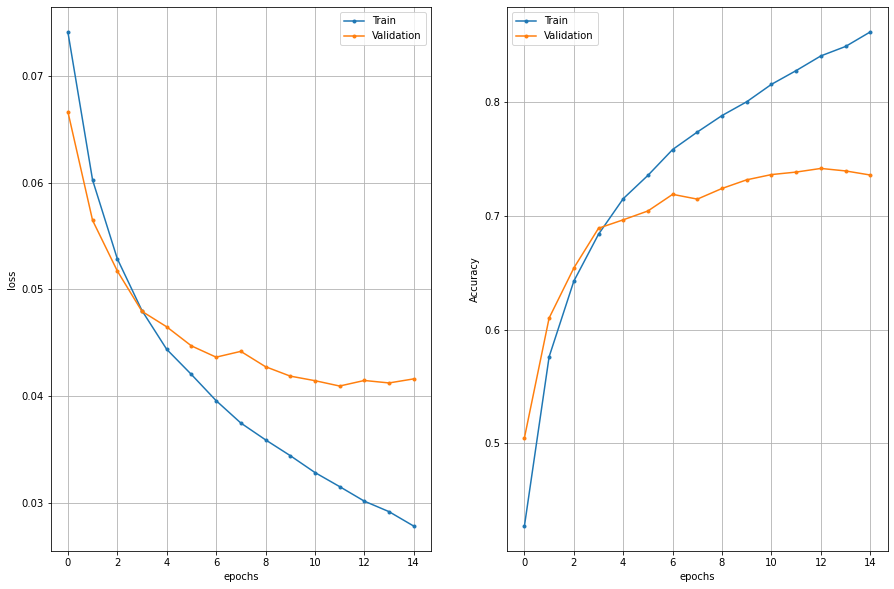

In [16]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])  

In [17]:
# Compute the labels and the predictions as sparse values
y_true = y_test
y_pred = model.predict(x_test)
y_true_argmax = np.argmax(y_true, axis=1)
y_pred_argmax = np.argmax(y_pred, axis=1)

313/313 [==============================] - 7s 21ms/step


In [18]:
# Compute and print the accuracy for each class
for class_id, class_name in classes.items():
    sum_class = 0
    for i in range(len(y_true_argmax)):
        if y_true_argmax[i] == class_id == y_pred_argmax[i]:
            sum_class = sum_class+1       
    acc = sum_class/np.sum(y_true[:,class_id])
    print(class_name, acc)

plane 0.831
car 0.838
bird 0.707
cat 0.602
deer 0.665
dog 0.451
frog 0.796
horse 0.767
ship 0.811
truck 0.804


In [19]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 7s 21ms/step - loss: 0.0429 - accuracy: 0.7272
Test loss   0.04288255795836449
Test metric 0.7271999716758728
